In [70]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
%pwd

'/content'

In [3]:
!nvidia-smi

Thu Sep 26 16:50:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


### **Clone the yolov9 repository**

In [5]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.17 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [6]:
!pwd

/content/yolov9


### **install roboflow**

In [7]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00


### **Download The models weights**

In [8]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [9]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Sep 26 16:51 .
drwxr-xr-x 1 root root      4096 Sep 26 16:51 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


### **Download example data**

In [10]:
!wget -P {HOME}/data -q https://transform.roboflow.com/5BZCQ3SiTIViLIDjHKm5syIyiXU2/b36f787a496714eeed744ad3e42dad34/thumb.jpg

In [12]:
SOURCE_IMAGE_PATH = f"{HOME}/data/thumb.jpg"

### **Detection with pre-trained models**

In [15]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/thumb.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/thumb.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only

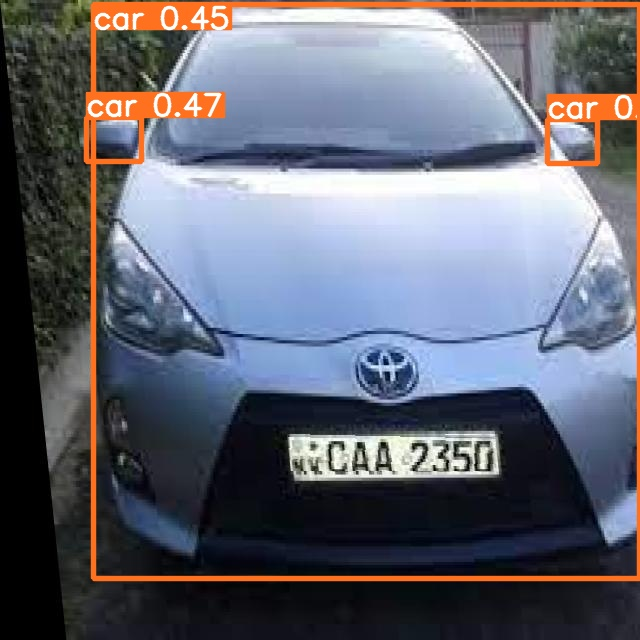

In [16]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/thumb.jpg", width=600)

### **Download the Dataset**

In [18]:
%cd {HOME}/yolov9

/content/yolov9


In [19]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qYbUhpc5QpBhydFinMx8")
project = rf.workspace("uni-yzlid").project("srilankan-number-plates")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Srilankan-Number-plates-1 in yolov9:: 100%|██████████| 1170/1170 [00:00<00:00, 6571.84it/s]


In [32]:
!pip install --upgrade pillow

### **Train Custom Model**

**Modify the Code [If needed]**
Open the file yolov9/utils/plots.py.

Locate the box_label function (around line 86).

Replace the line:

python
Copy code
w, h = self.font.getsize(label)  # text width, height
with:

python
Copy code
w, h = self.font.getbbox(label)[2:4]  # text width, height
The method getbbox provides the bounding box dimensions, which works with newer versions of Pillow.

In [34]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Srilankan-Number-plates-1/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-09-26 17:35:21.347893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 17:35:21.367890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 17:35:21.373826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 17:35:21.395981: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 17:35:22.594091: W

### **Examine Training Results**

In [35]:
!ls {HOME}/yolov9/runs/train/exp6/

confusion_matrix.png				     P_curve.png       train_batch2.jpg
events.out.tfevents.1727372123.8dc7f98e25e6.12781.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					     R_curve.png       val_batch0_pred.jpg
hyp.yaml					     results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				     results.png       val_batch1_pred.jpg
labels.jpg					     train_batch0.jpg  weights
opt.yaml					     train_batch1.jpg


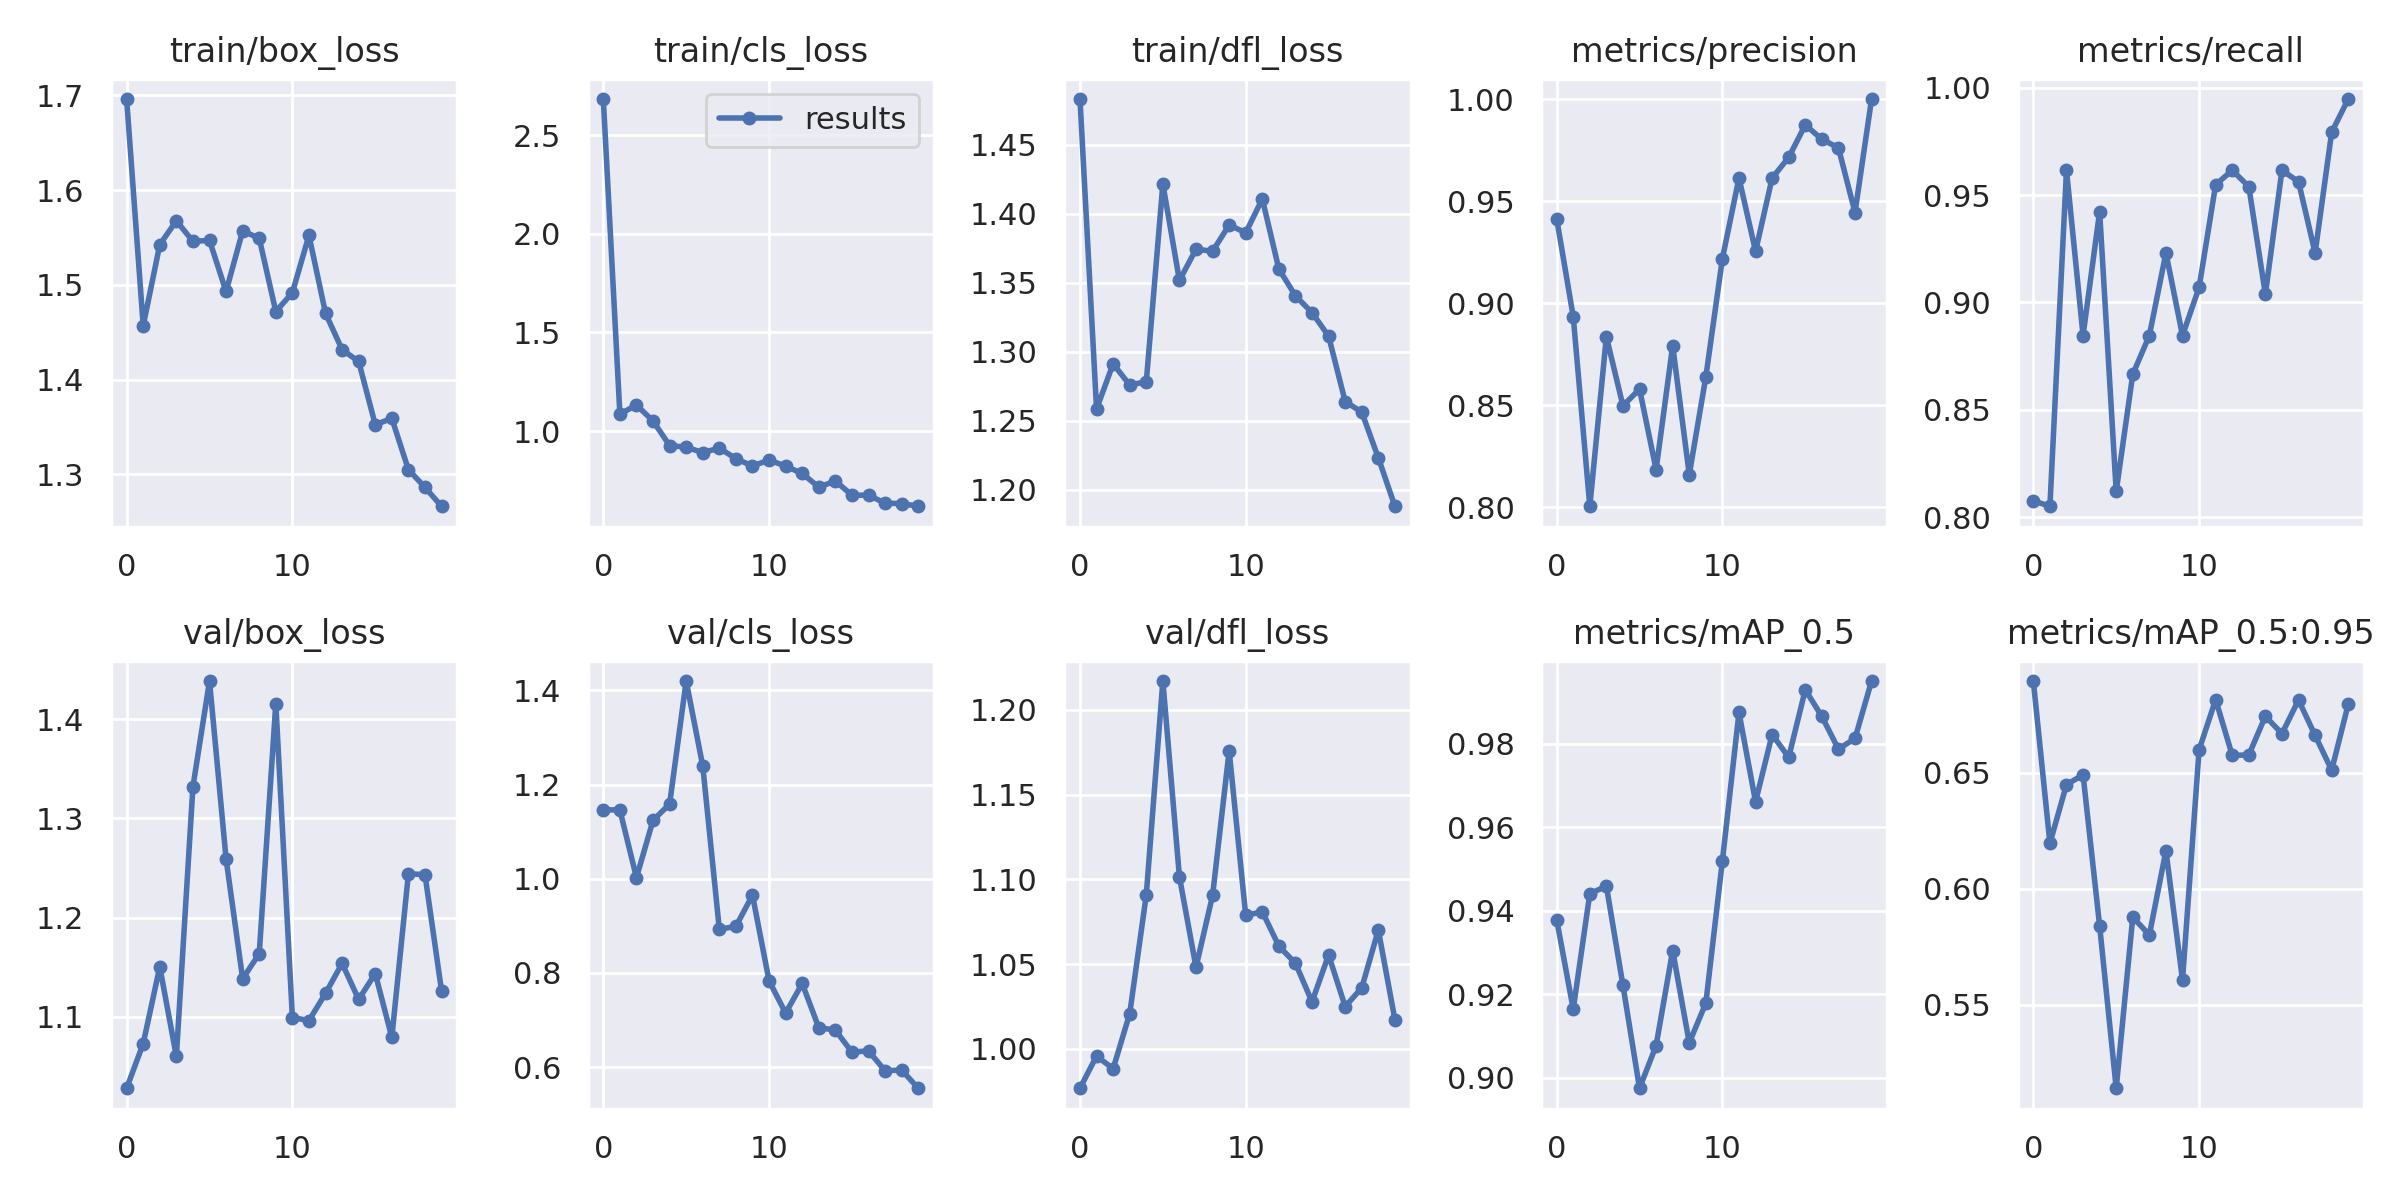

In [36]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp6/results.png", width=1000)

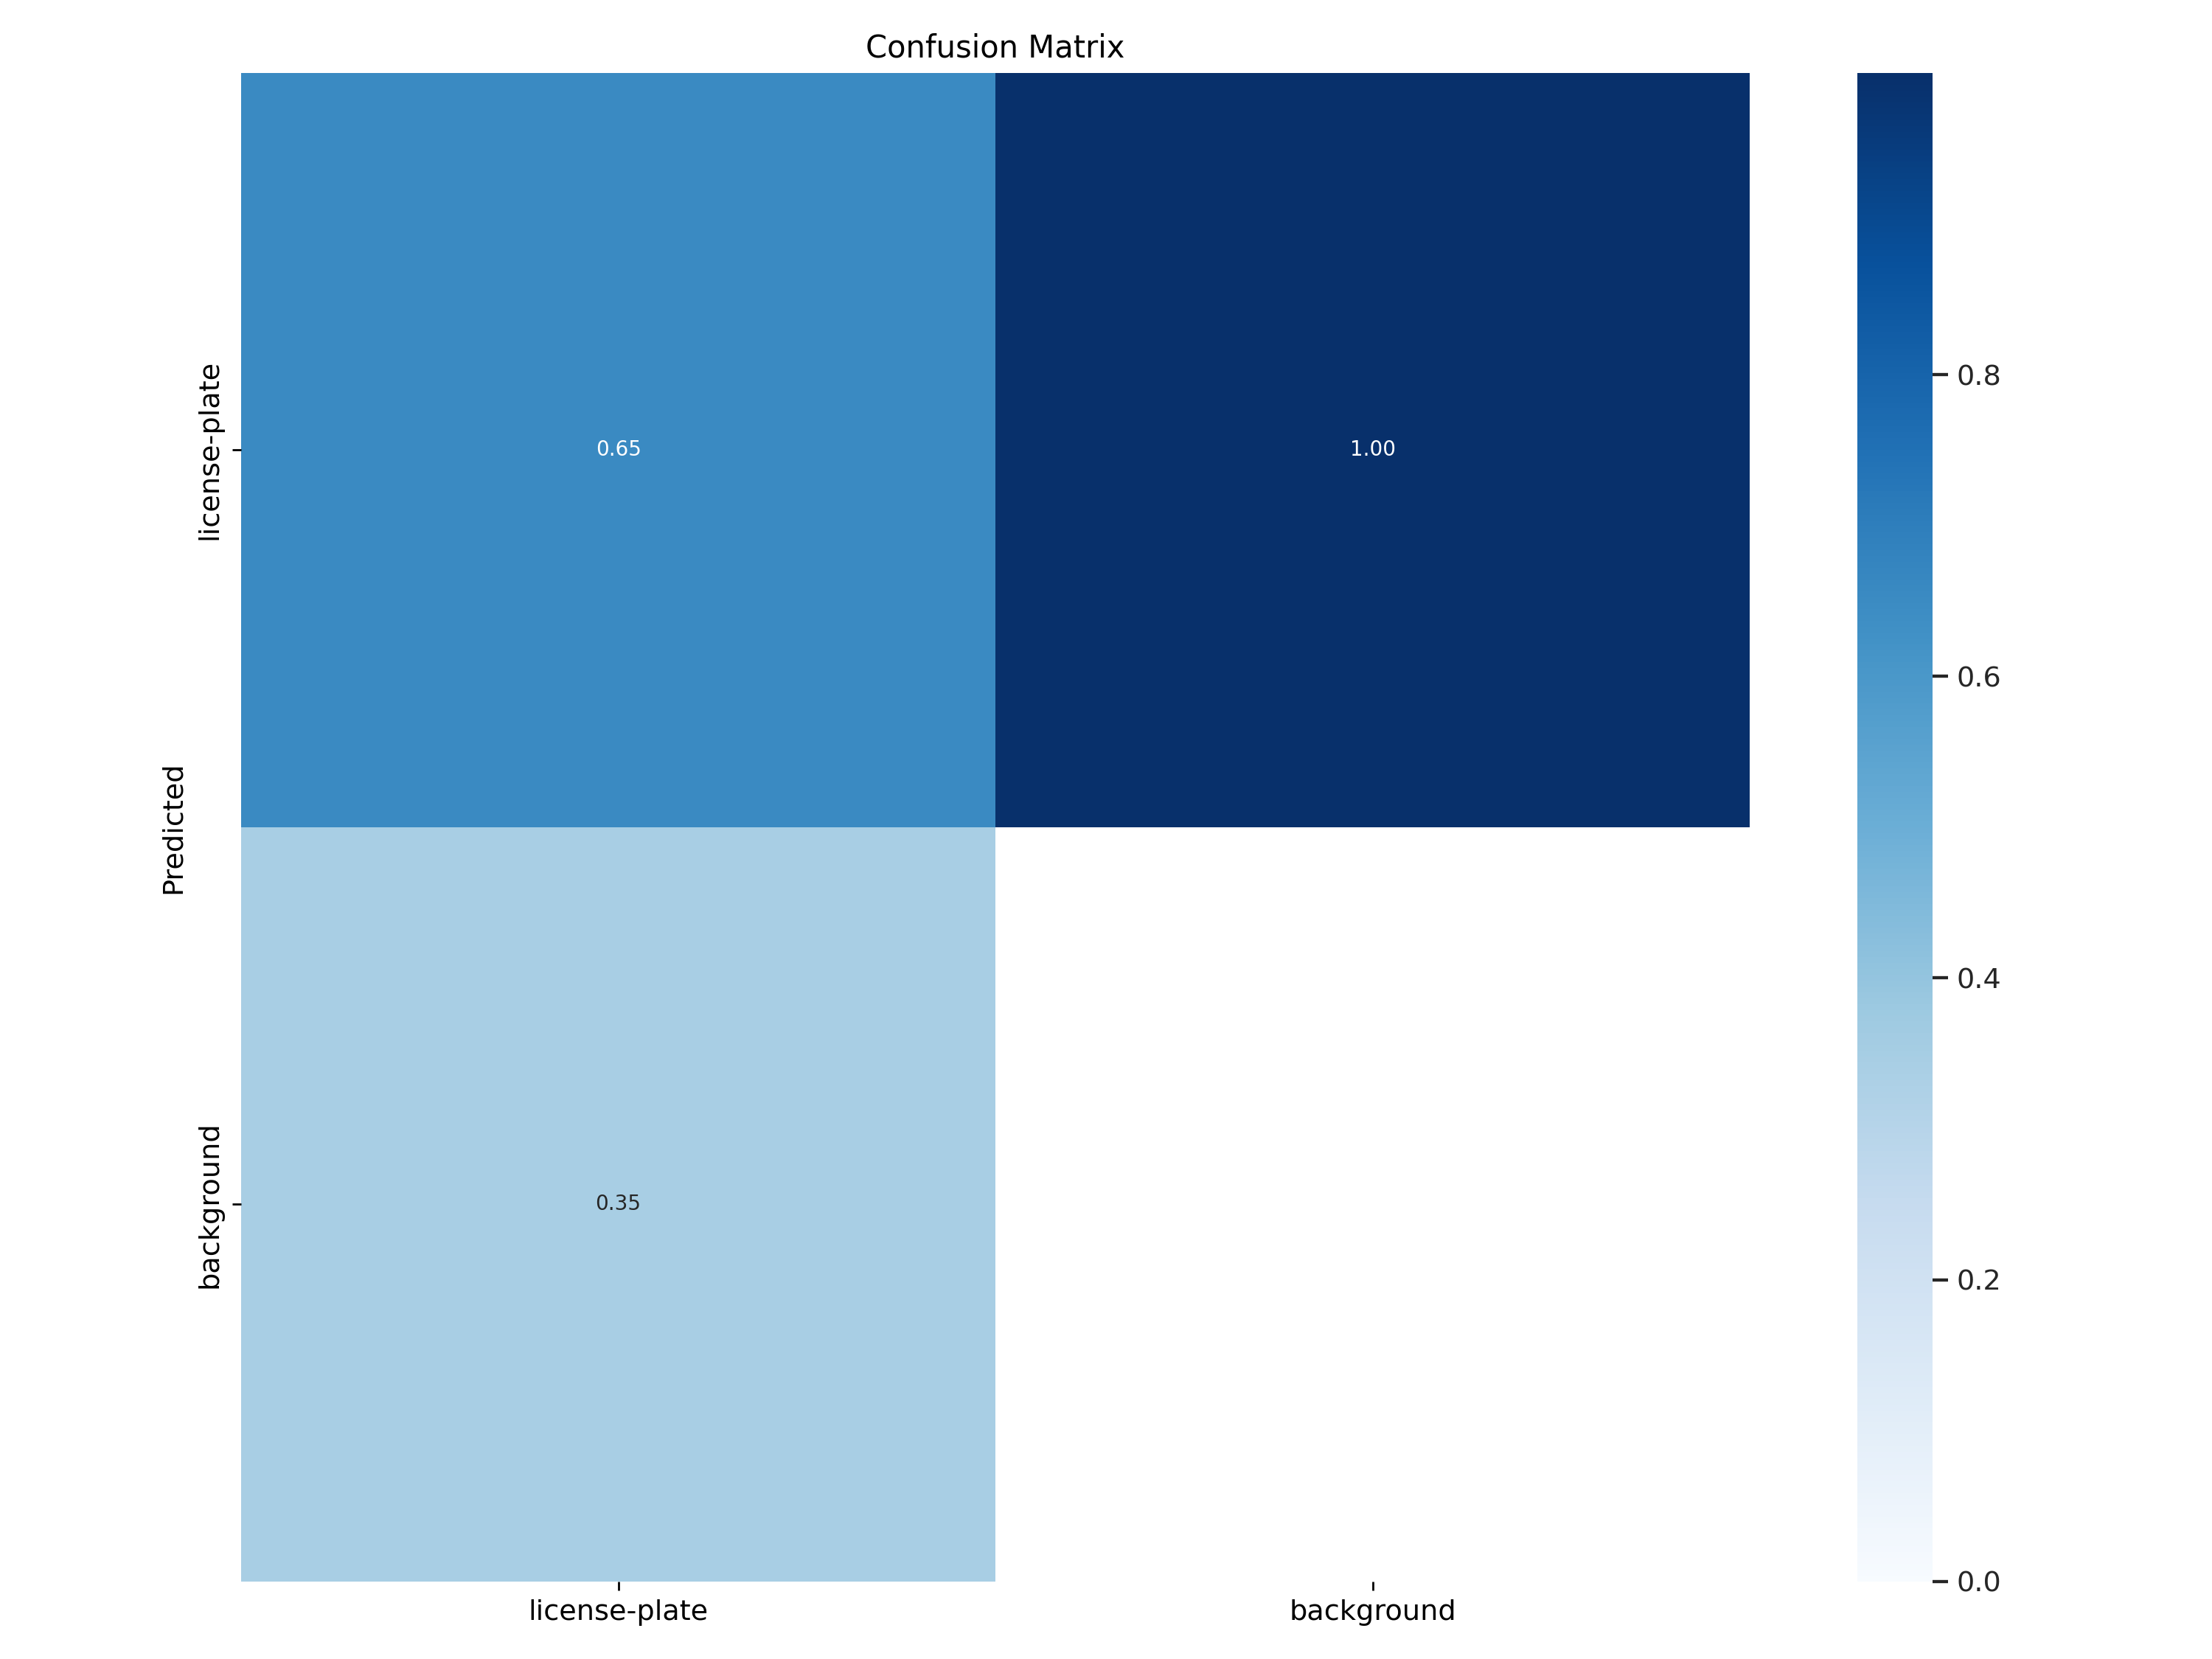

In [37]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp6/confusion_matrix.png", width=1000)

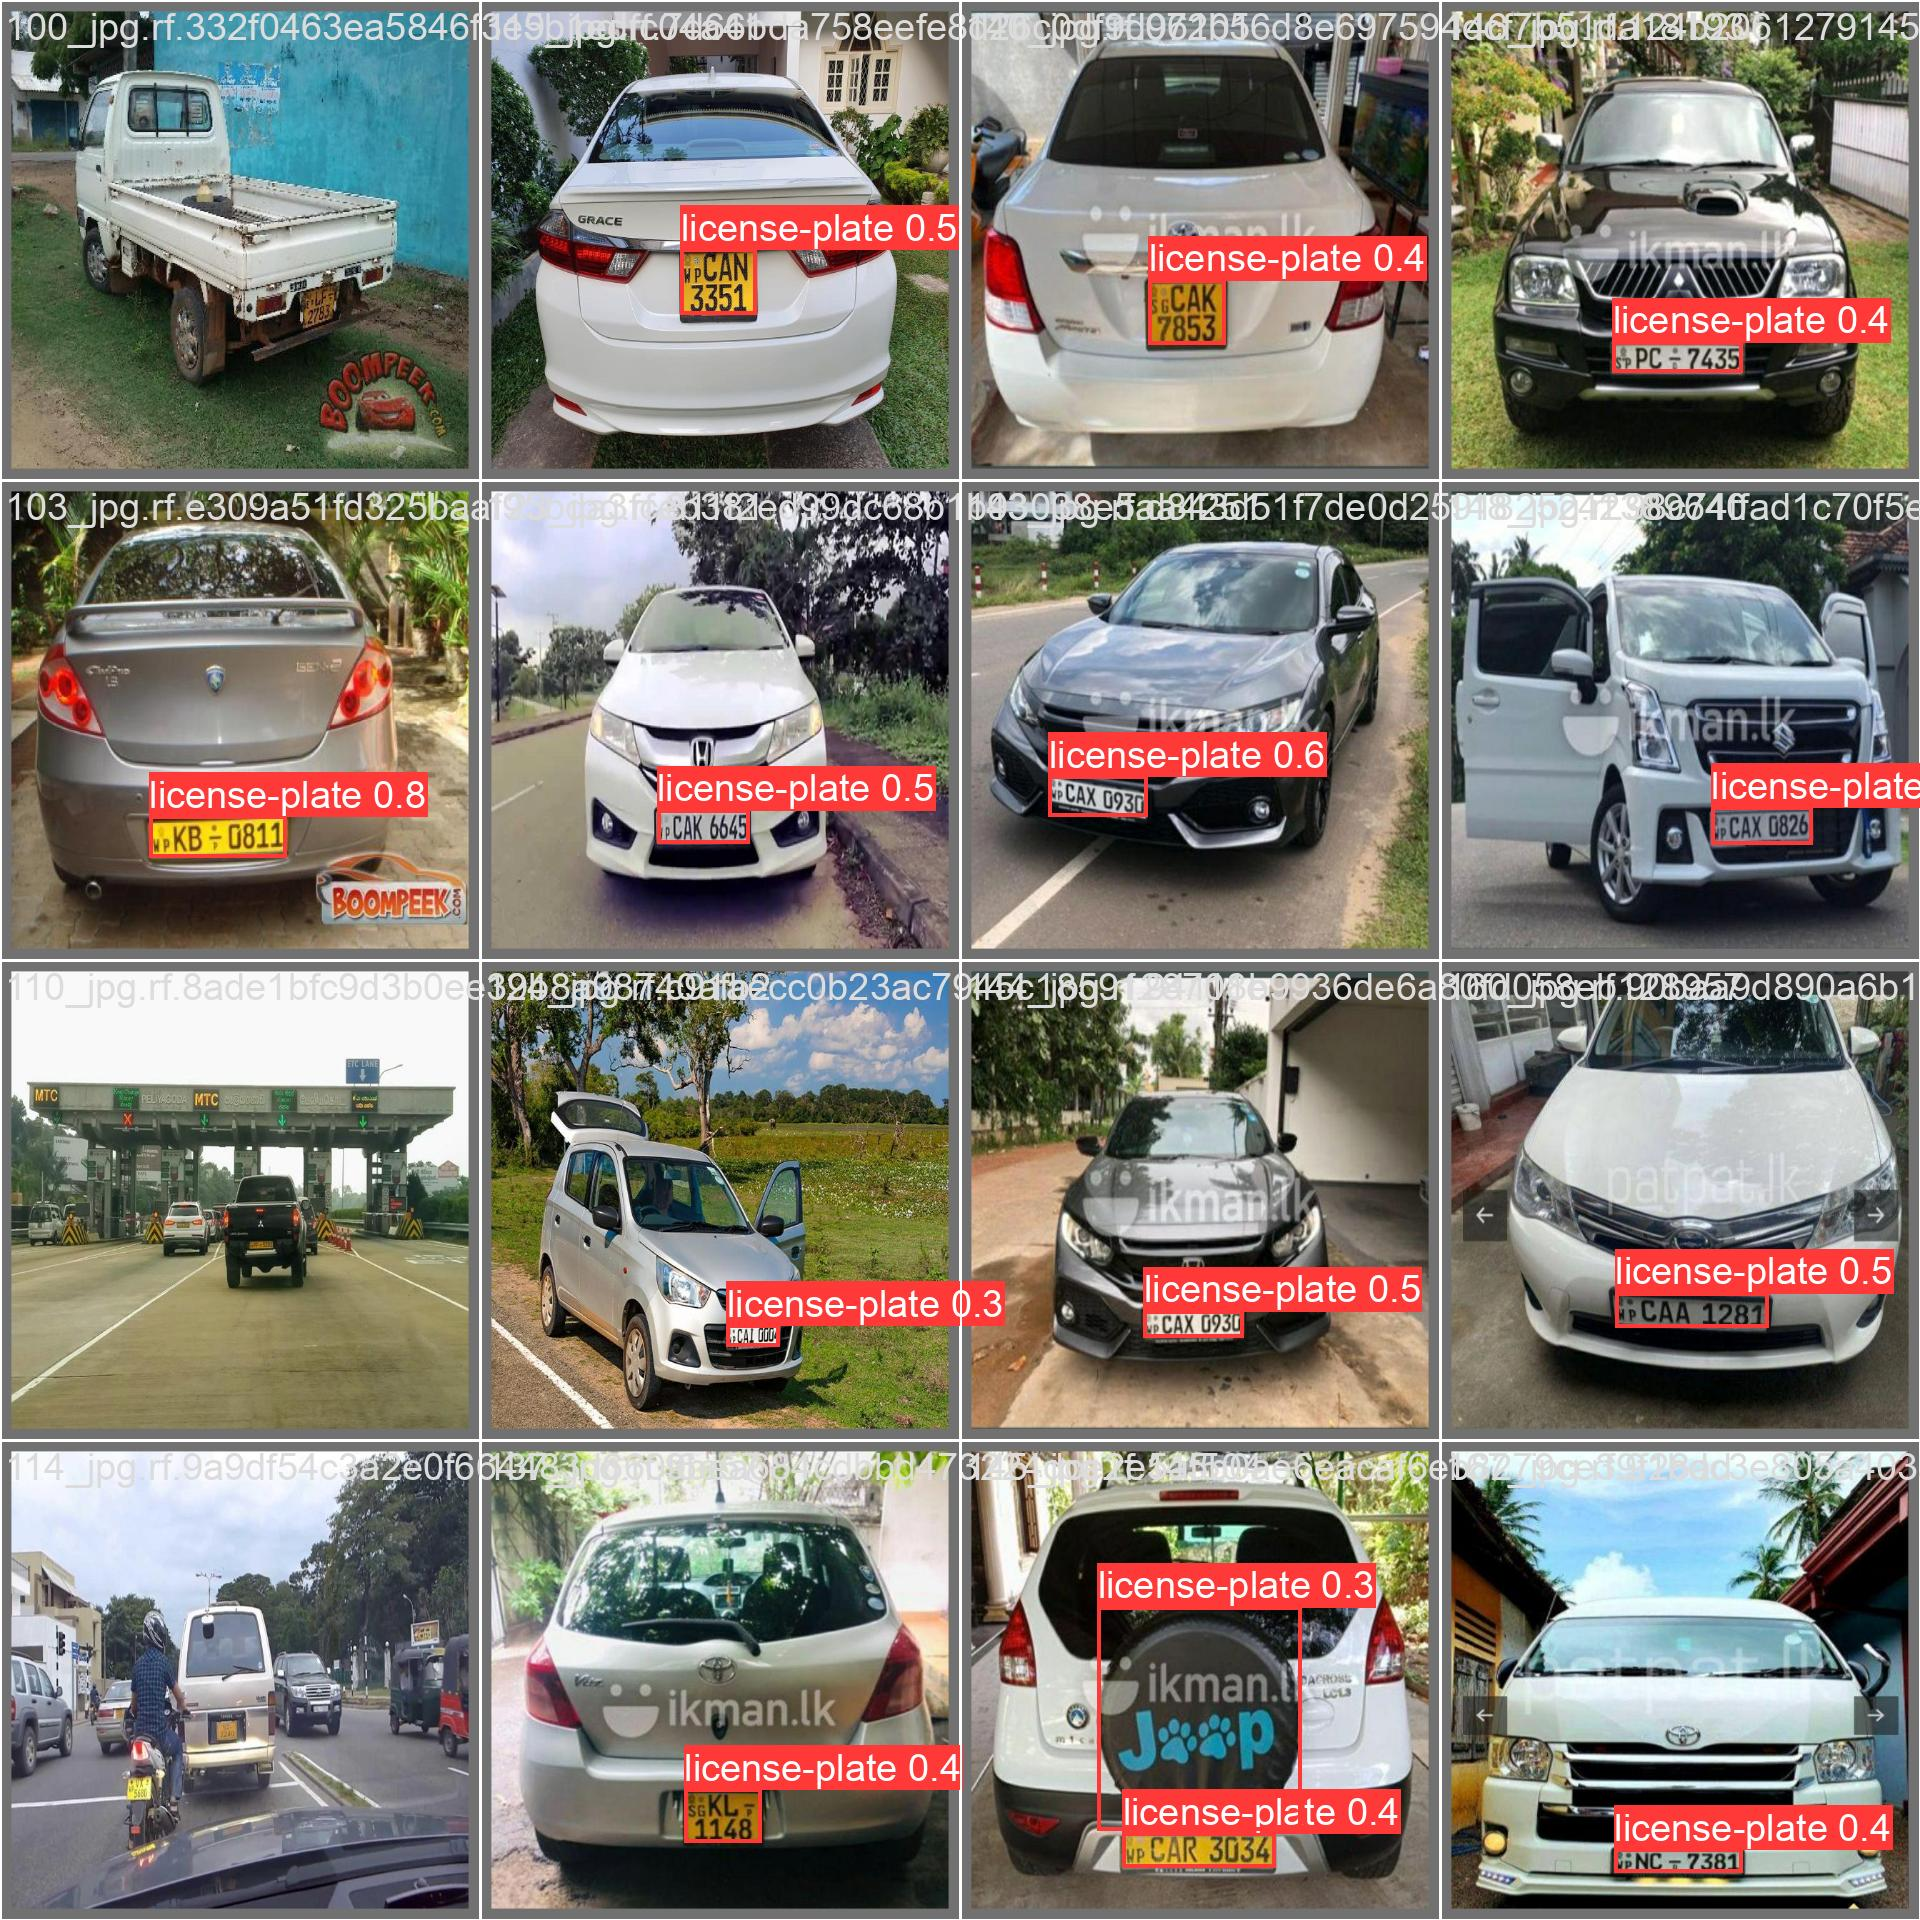

In [38]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp6/val_batch0_pred.jpg", width=1000)

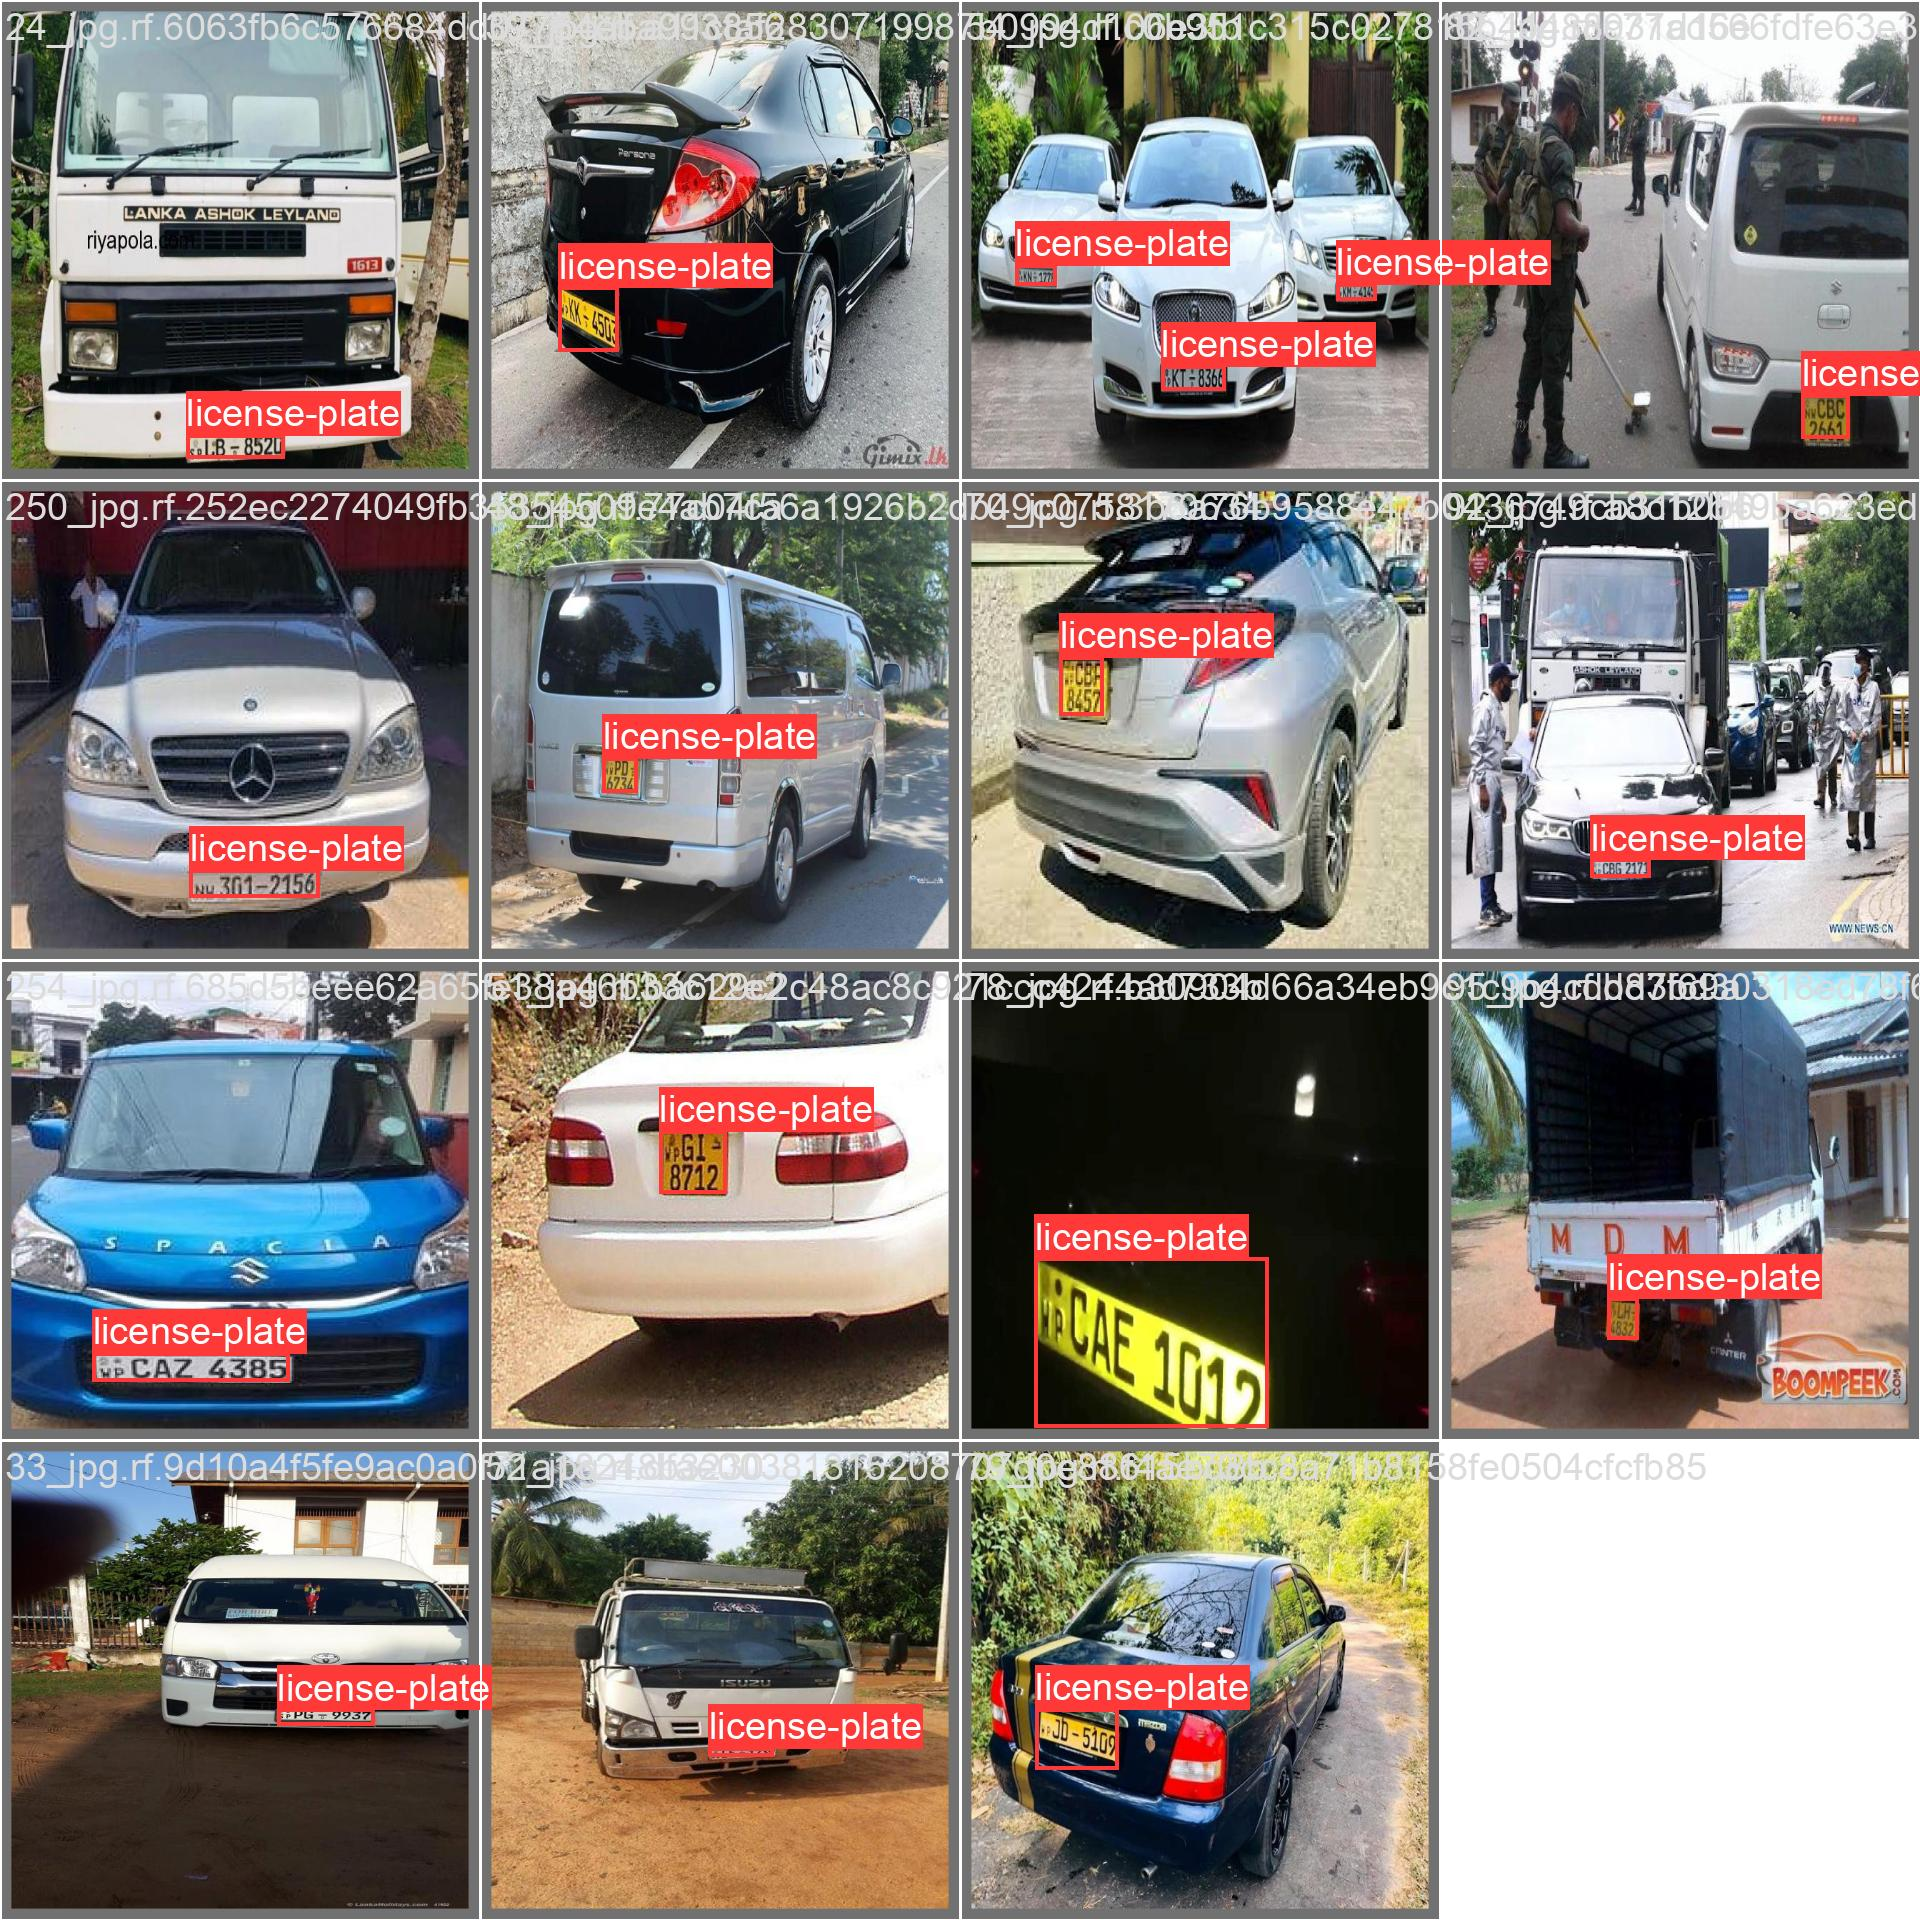

In [39]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp6/val_batch1_labels.jpg", width=1000)

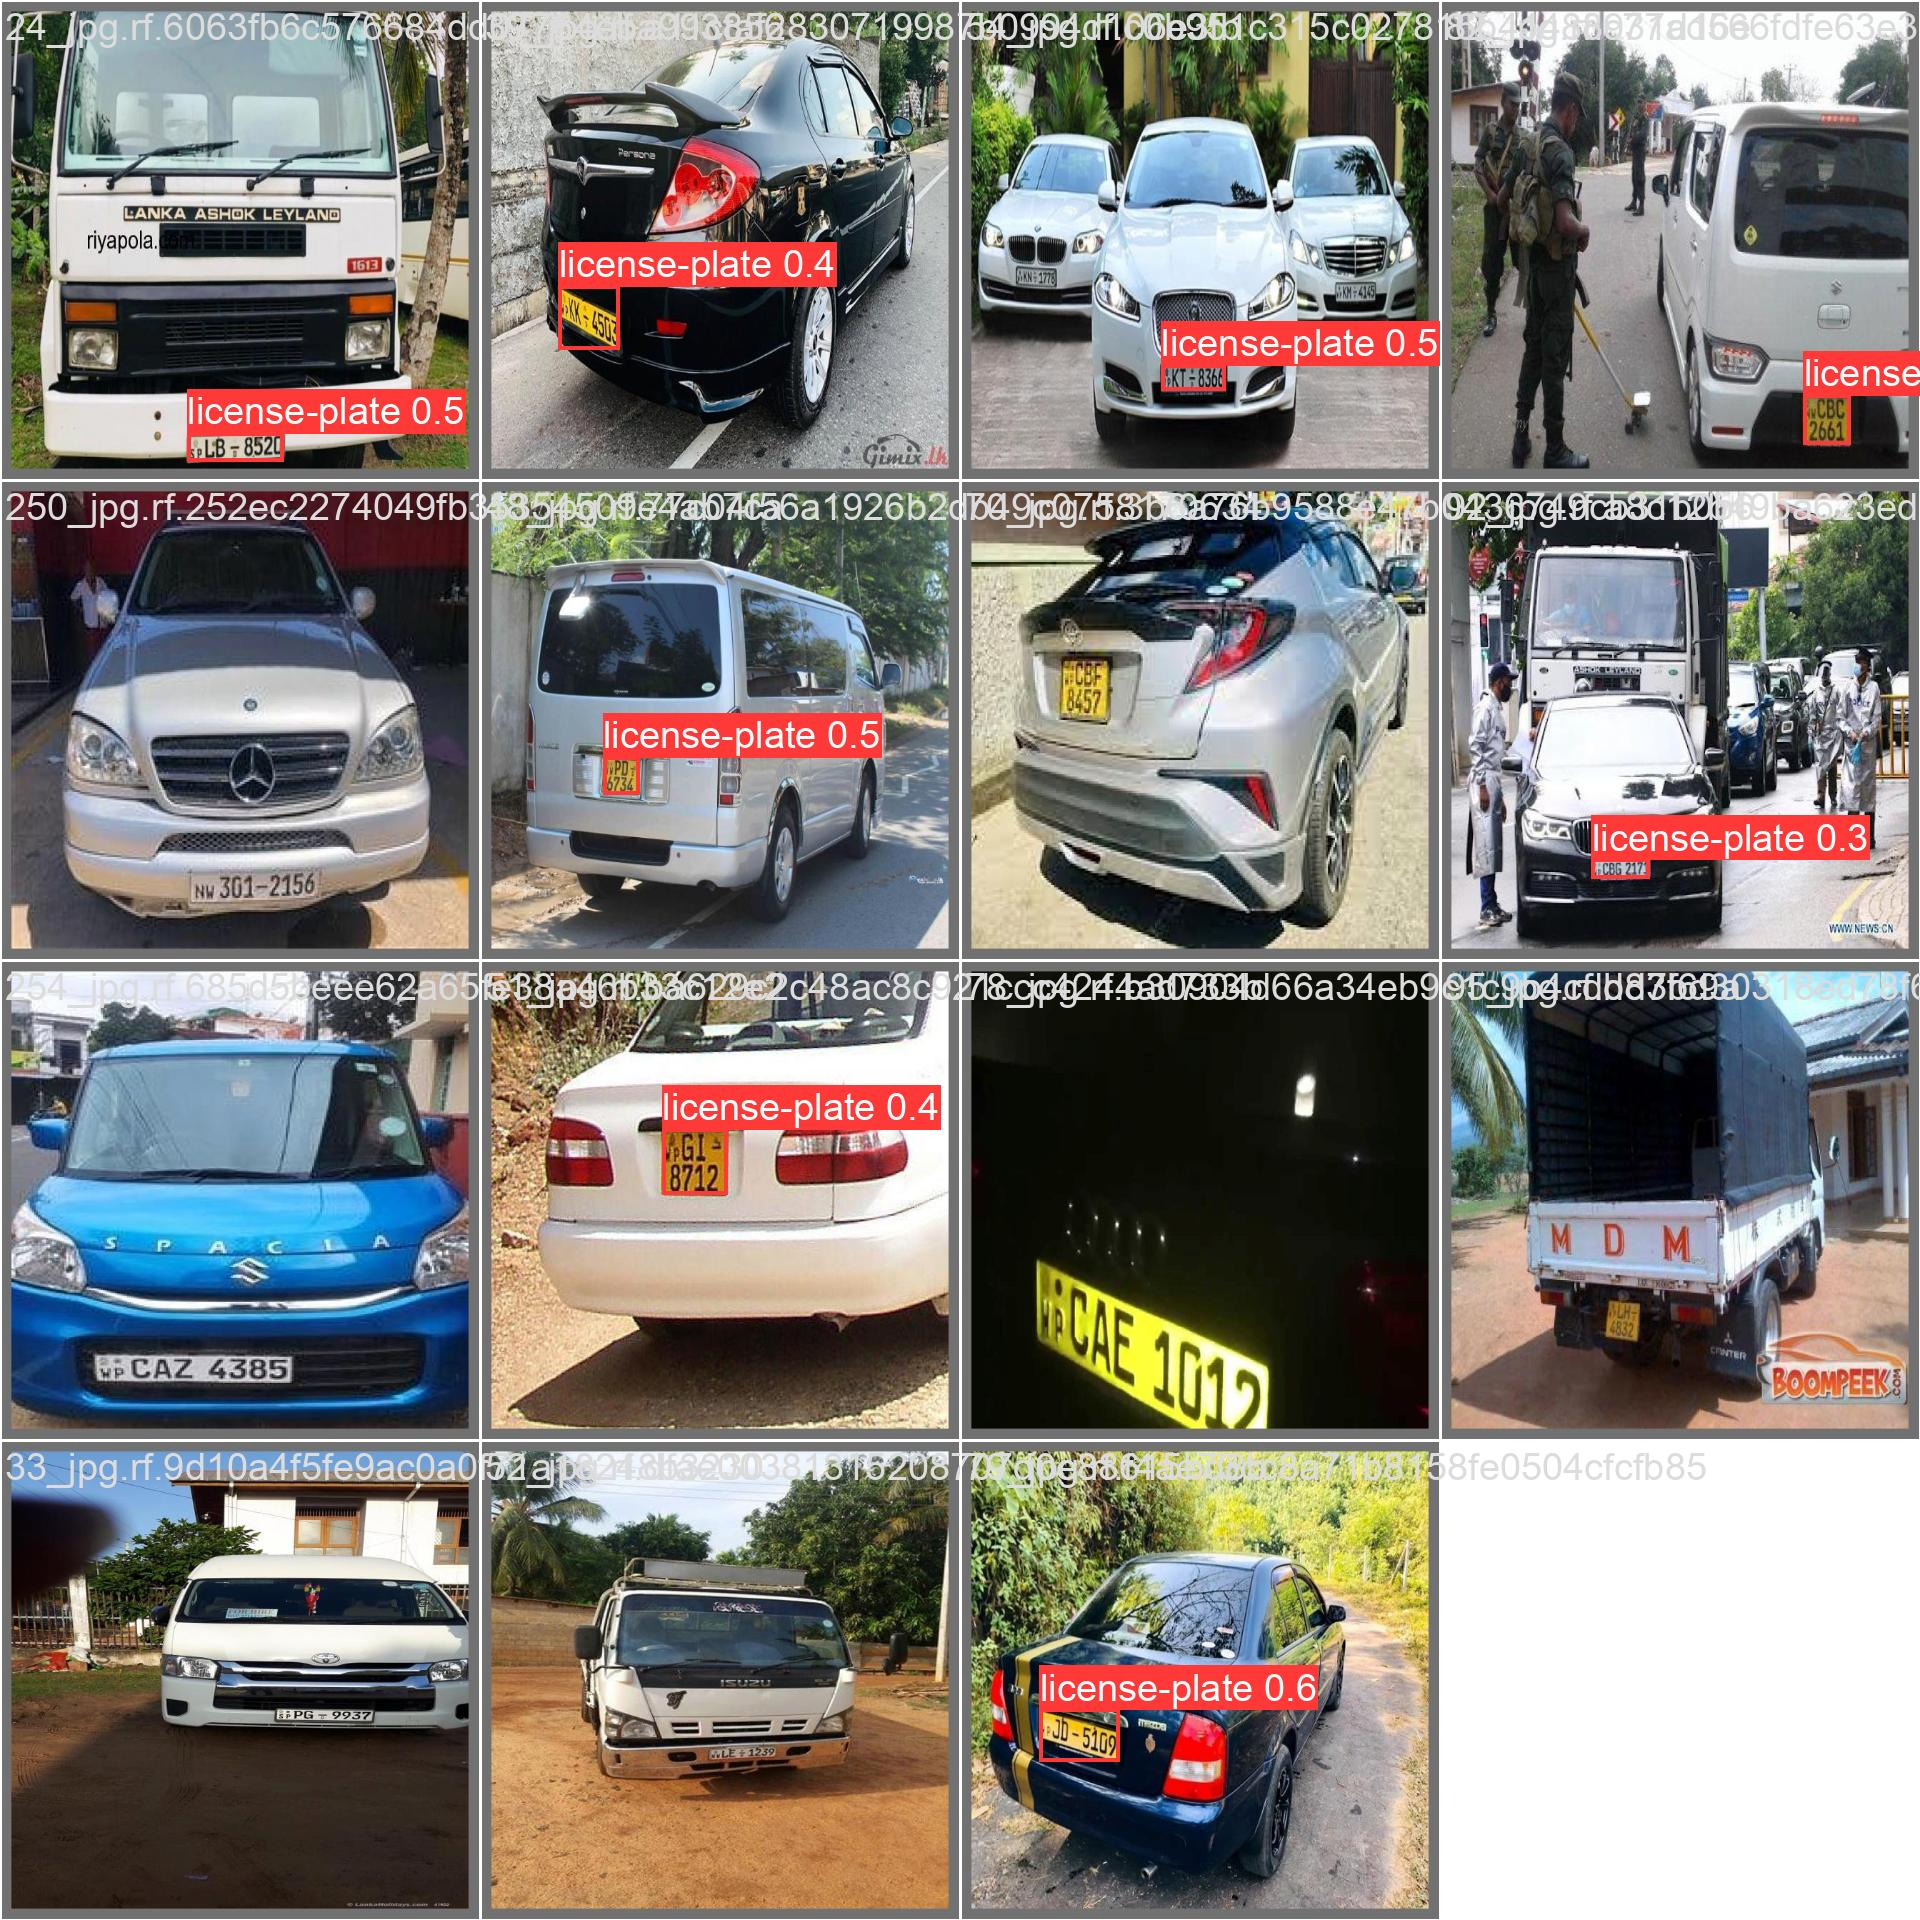

In [40]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp6/val_batch1_pred.jpg", width=1000)

### **Validate Custom Model**

In [41]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/yolov9/Srilankan-Number-plates-1/data.yaml \
--weights {HOME}/yolov9/runs/train/exp6/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Srilankan-Number-plates-1/data.yaml, weights=['/content/yolov9/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This lim

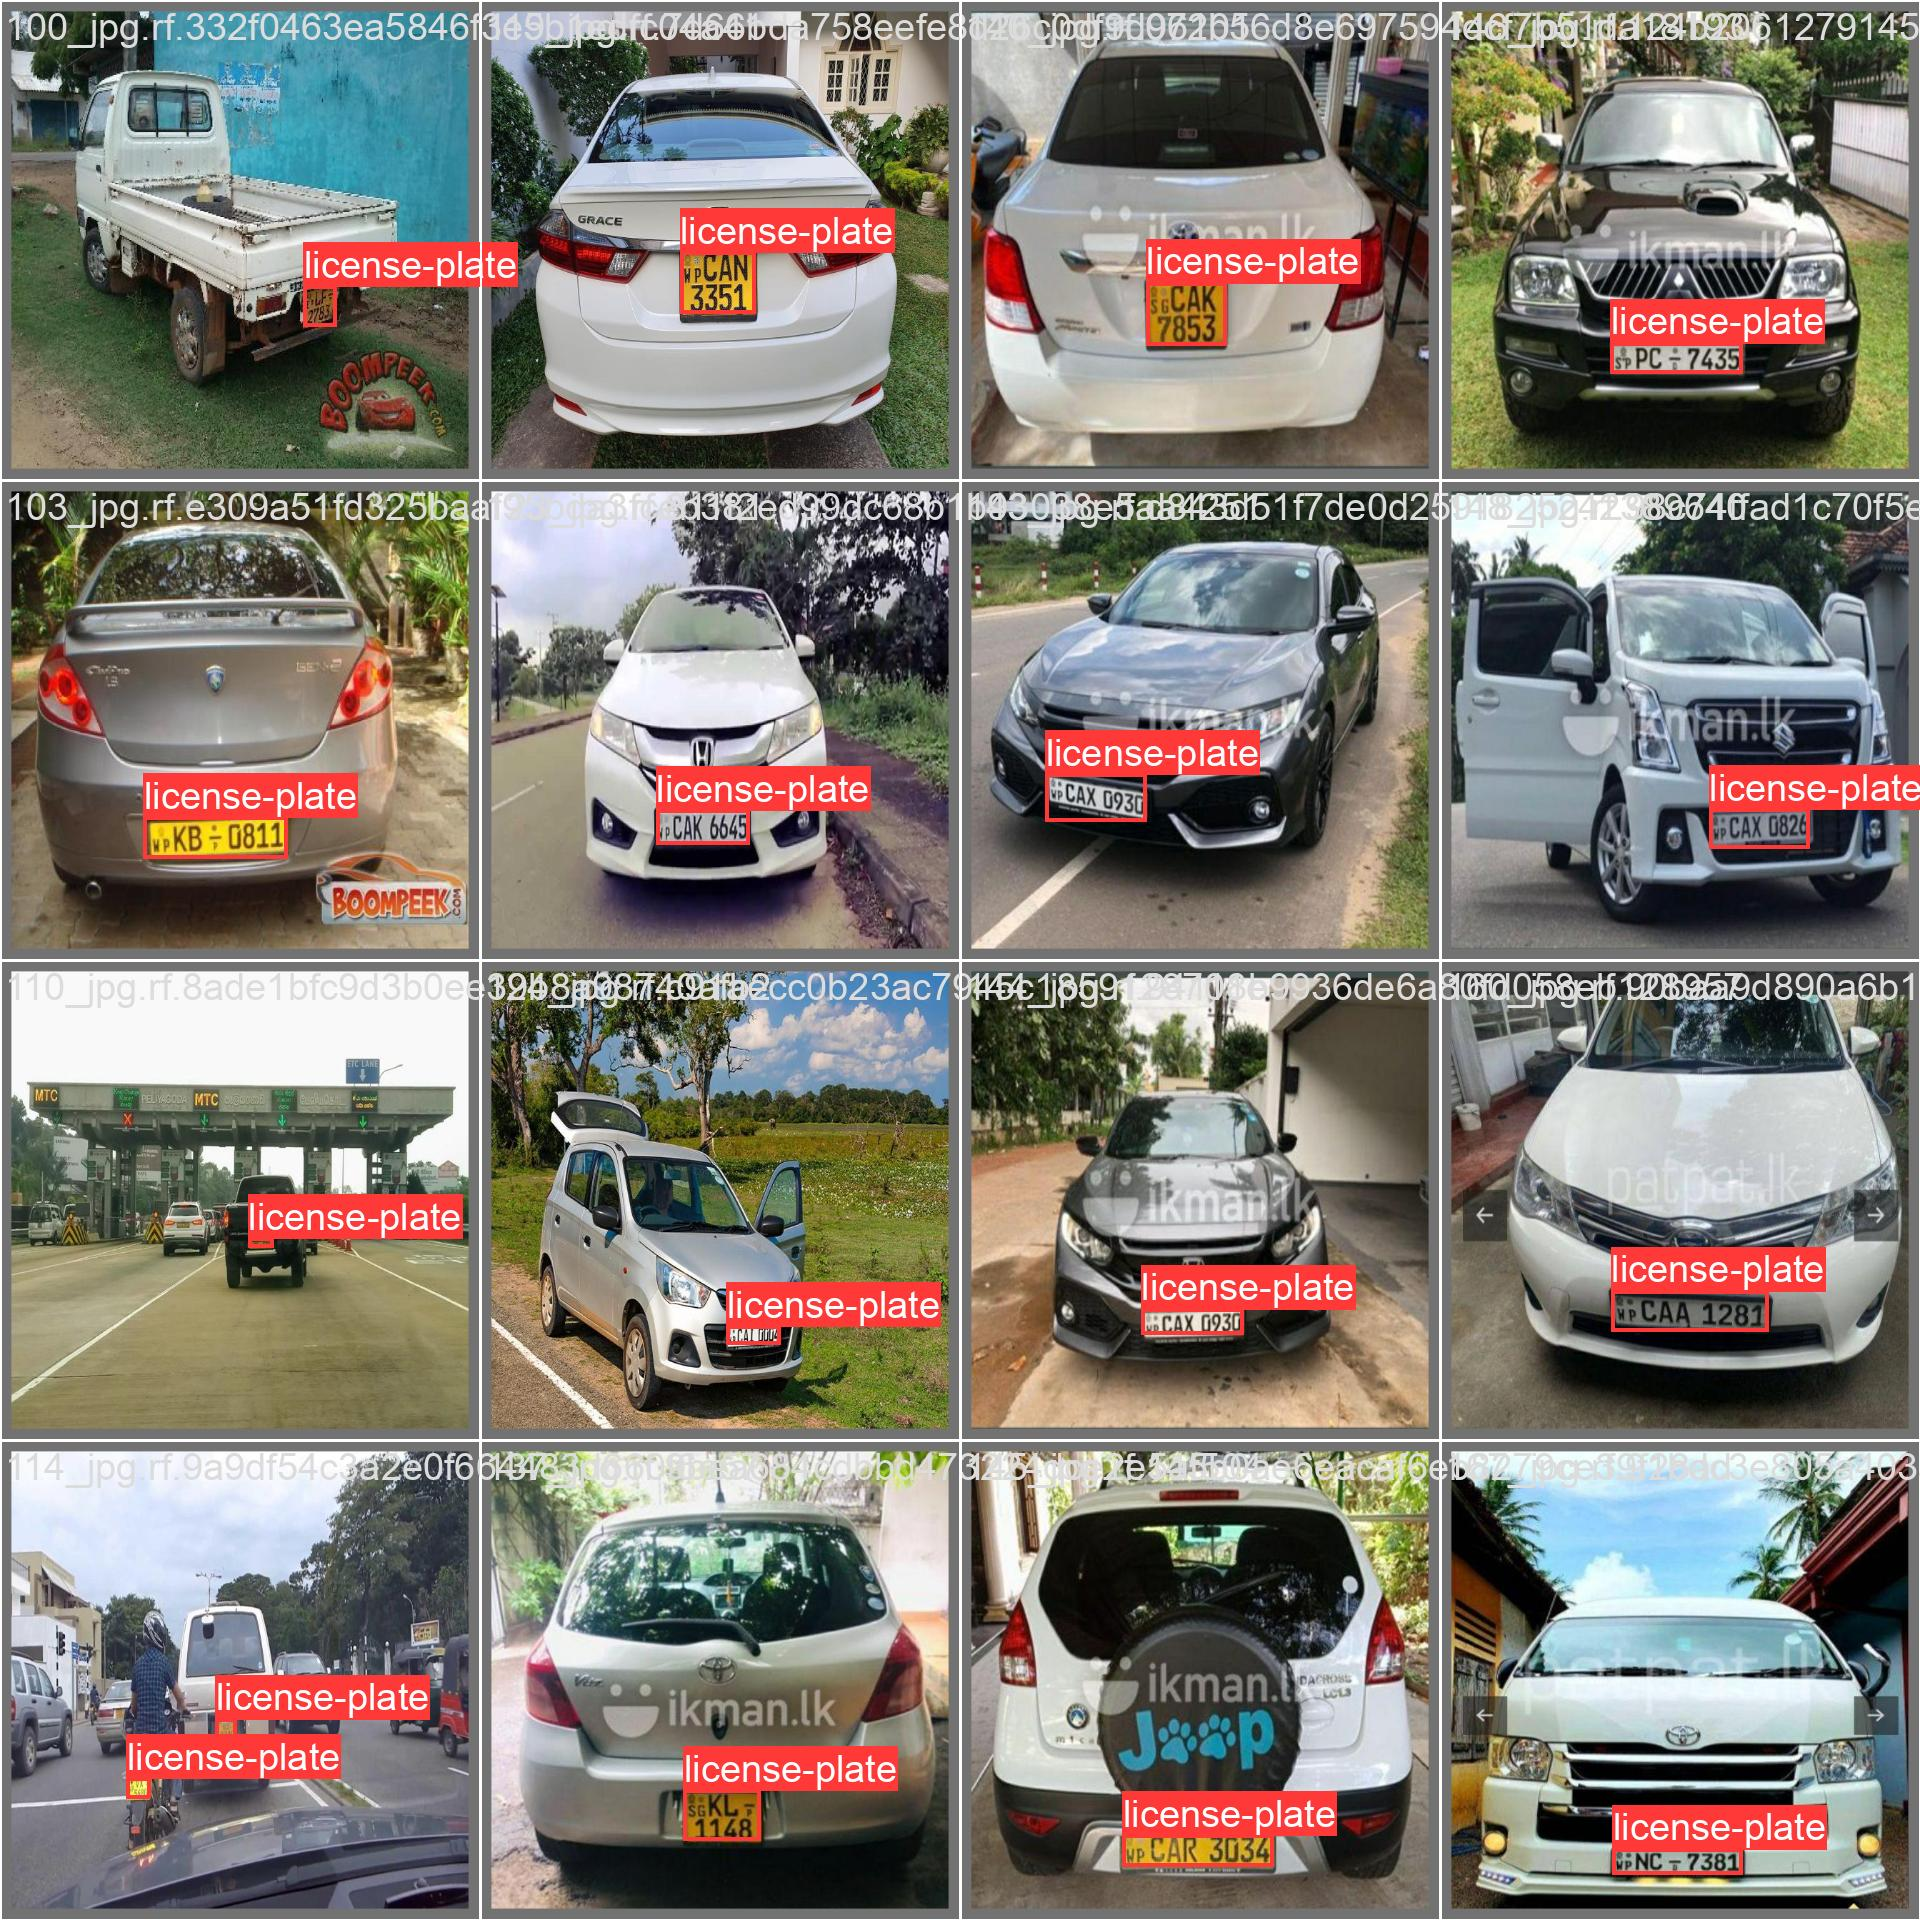

In [43]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch0_labels.jpg", width=1000)

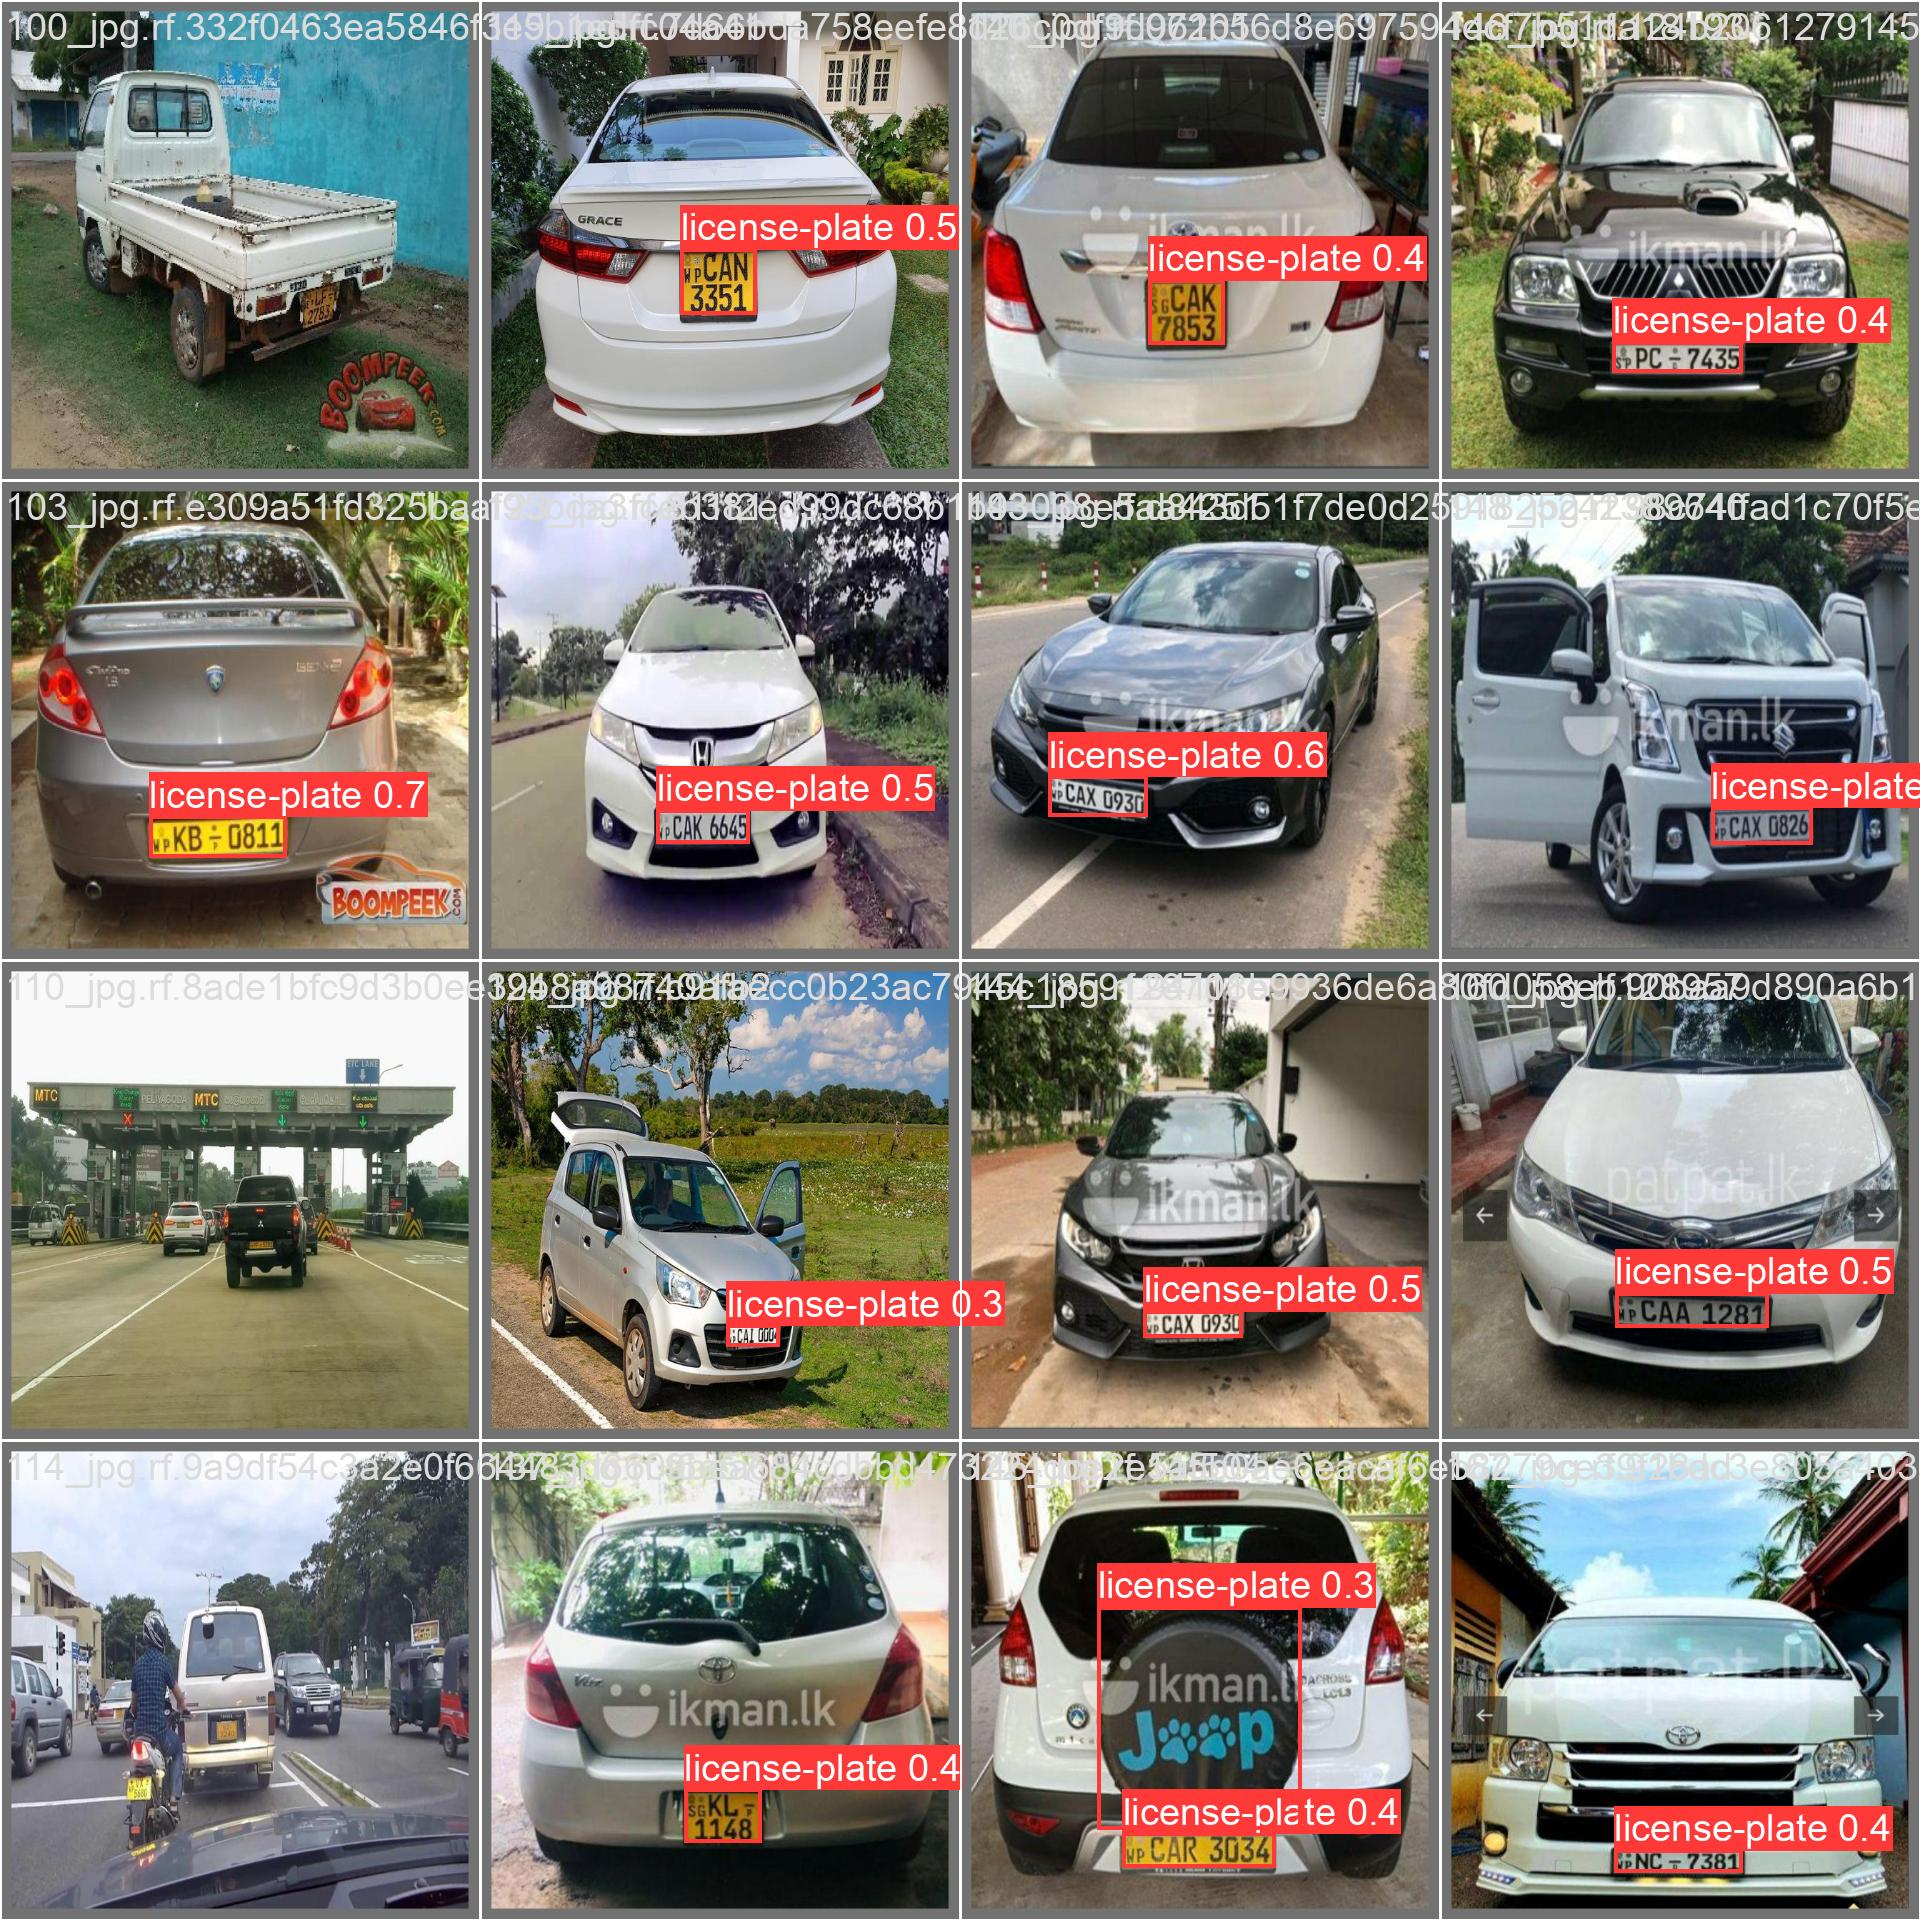

In [45]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/val/exp/val_batch0_pred.jpg", width=1000)

### **Inference with Custom Model**

In [46]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/Srilankan-Number-plates-1/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/Srilankan-Number-plates-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a 

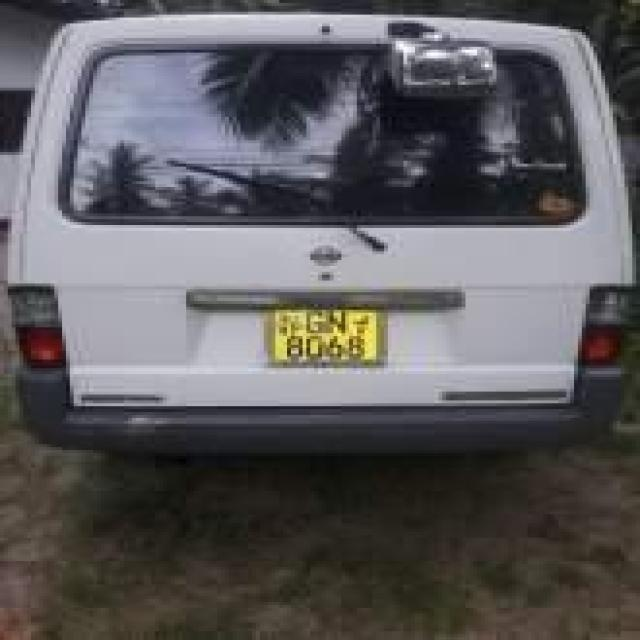

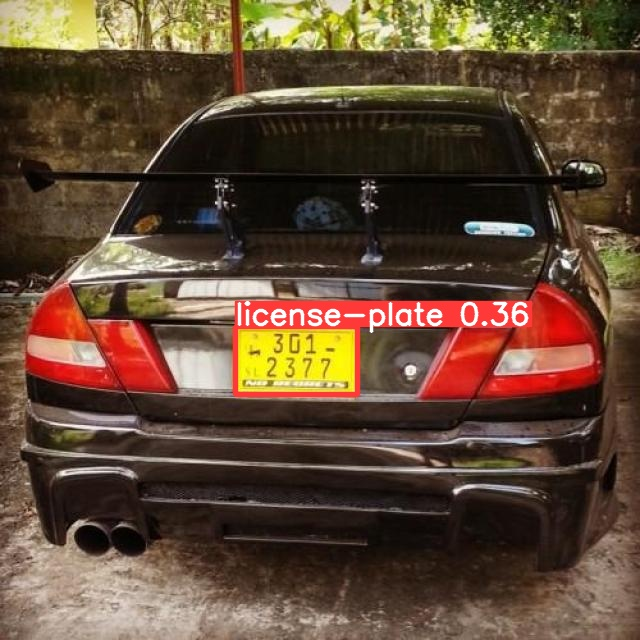

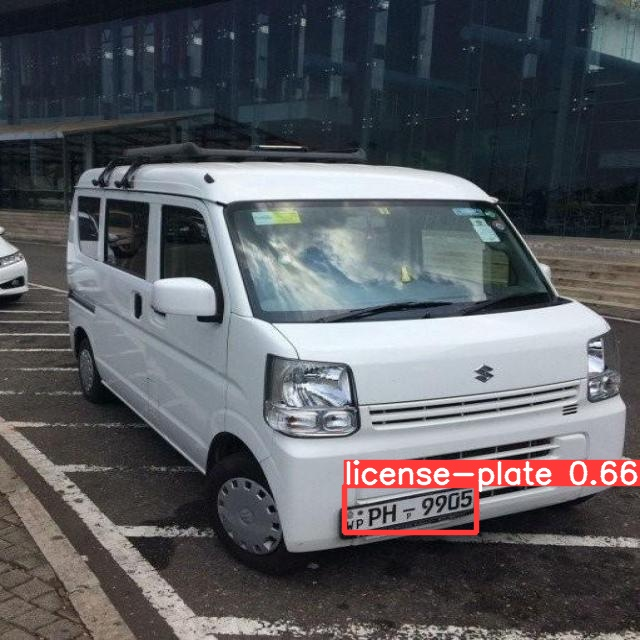

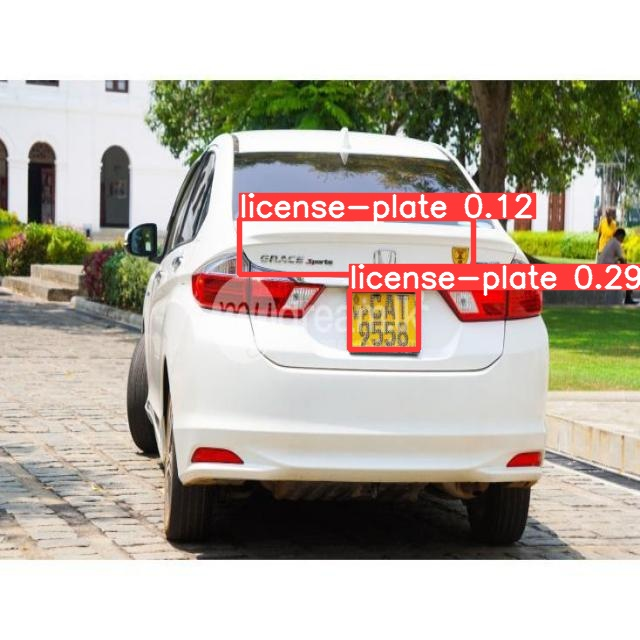

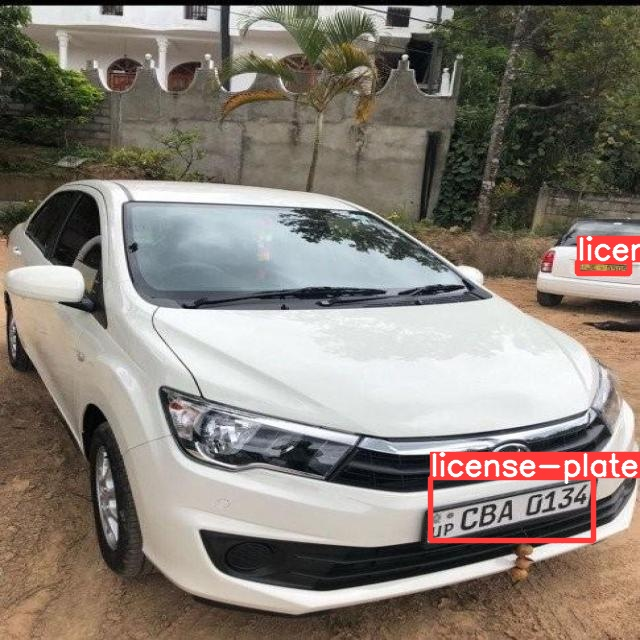

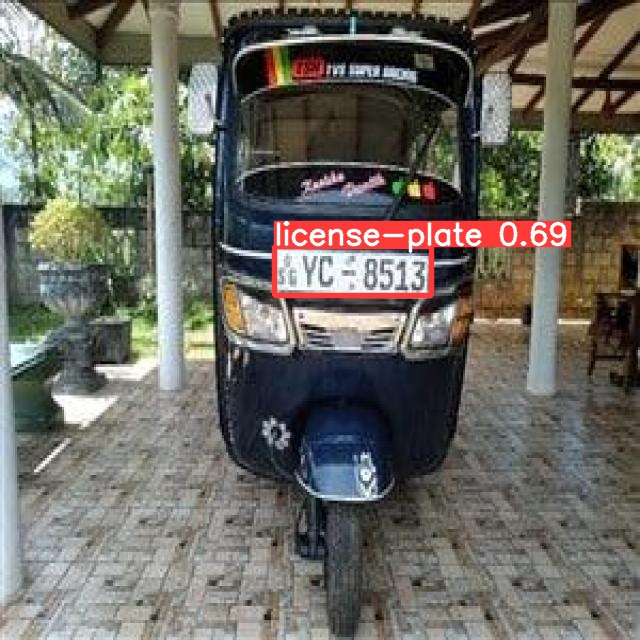

In [50]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[10:16]:
      display(Image(filename=image_path, width=400))

In [ ]:

# # video
# !python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp6/weights/best.pt --source car.mp4

# **Number Plate Recognition**
## ***Yolo v9 + easyOCR***
NOTE-:Upload The anpr.py file to the yolov9 folder

In [51]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 27.0 MB/s eta 0:00:00


**NOTE-: Upload the source video**

In [52]:
%pwd

'/content/yolov9'

In [53]:

# video
!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp6/weights/best.pt --source car.mp4

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDownloading recognition model, please wait. This may take several minutes depending upon your network connection.
Progress: |██████████████████████████████████████████████████| 100.0% Completeanpr: weights=['/content/yolov9/runs/train/exp6/weights/best.pt'], source=car.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle mod